In [34]:
from Type_simulation import *
from Benchmark import *

# Benchmarks

* [Linéaire logistique](#lineaire)
    * [coef_tt = 1.1 (constant)](#lconstant)
        * [1 modèle sans poids](#lc1mod)
        * [1 modèle avec poids](#lc1modw)
        * [2 modèles avec poids](#lc2modw)
        * [Comparaison](#lcbench)
    * [coef_tt = 1 * std(XB)](#lnconstant)
        * [1 modèle sans poids](#lnc1mod)
        * [1 modèle avec poids](#lnc1modw)
        * [2 modèles avec poids](#lnc2modw)
        * [Comparaison](#lncbench)
* [Linéaire + intéraction](#interaction)
    * [coef_tt = 1.1 (constant)](#intconstant)
        * [1 modèle sans poids](#intc1mod)
        * [1 modèle avec poids](#intc1modw)
        * [2 modèles avec poids](#intc2modw)
        * [Comparaison](#intcbench)
    * [coef_tt = 1 * std(XB)](#intnconstant)
        * [1 modèle sans poids](#intnc1mod)
        * [1 modèle avec poids](#intnc1modw)
        * [2 modèles avec poids](#intnc2modw)
        * [Comparaison](#intncbench)
* [Non linéaire](#nlineaire)
    * [coef_tt = 1 * std(XB)](#nlnconstant)
        * [1 modèle sans poids](#nlnc1mod)
        * [1 modèle avec poids](#nlnc1modw)
        * [2 modèles avec poids](#nlnc2modw)
        * [Comparaison](#nlncbench)

In [35]:
param_sim = {
    'n_features': 25,
    'n_classes': 2,
    'n_samples': 1000,
    'beta': [0.1, 0.1, 0.3],
    'coef_tt': 1.1,
    'rho': 15
}
idx = np.arange(param_sim['n_features'])
param_sim['beta'] = (-1) ** idx * np.exp(-idx / 20.)
param_sim['alpha'] = (-1) ** idx * np.exp(-idx / 20.) /3

w_values_bench = np.arange(0,8.,2)
w_values_graph = np.arange(0,8,0.1)

In [42]:
def benchmarking_graph(nbr_model ,weight, function_type, coef_tt, coef_tt_const, function = None, pi = sigmoid):
    
    if nbr_model == 1:
        
        param_sim = {
        'n_features': 25,
        'n_classes': 2,
        'n_samples': 1000,
        'beta': [0.1, 0.1, 0.3],
        'coef_tt': coef_tt,
        'rho': 15
        }
        idx = np.arange(param_sim['n_features'])
        param_sim['beta'] = (-1) ** idx * np.exp(-idx / 20.)
        param_sim['alpha'] = (-1) ** idx * np.exp(-idx / 20.) /3


        w_values = np.arange(0,8,0.1)
        list_WD = []

        list_pehe_rf = []
        list_pehe_xgb = []
        list_pehe_logit = []

        list_accu_sign_cate_rf = []
        list_accu_sign_cate_xgb = []
        list_accu_sign_cate_logit = []

        simu = Simulation_mod(param_sim)
        for w in w_values:
            #simu = Simulation_mod(param_sim)
            simu.simule(wd_para=w, function_type= function_type , coef_tt_const=coef_tt_const , function=function, pi=pi)
            bench_one = Benchmark(simu)
            bench_one.prep_bench()
    
            WD = simu.wd
            list_WD.append(WD)
    
            rf_model = RandomForestRegressor()
            xgb_model = xgb.XGBRegressor()
            logit_model = linear_model.LogisticRegression()

            bench_one.benchmark_one_model(model = rf_model, type_model= "regressor", name_model="RF",weight=weight)
            list_pehe_rf.append(bench_one.PEHE)
            list_accu_sign_cate_rf.append(bench_one.accu_sign_cate)
    
            bench_one.benchmark_one_model(model = xgb_model, type_model= "regressor",name_model="xgb", weight=weight)
            list_pehe_xgb.append(bench_one.PEHE)
            list_accu_sign_cate_xgb.append(bench_one.accu_sign_cate)
    
            bench_one.benchmark_one_model(model = logit_model, type_model= "classifier", name_model="logit", weight=weight)
            list_pehe_logit.append(bench_one.PEHE)
            list_accu_sign_cate_logit.append(bench_one.accu_sign_cate)
            
    elif nbr_model == 2:
            
        param_sim = {
        'n_features': 25,
        'n_classes': 2,
        'n_samples': 1000,
        'beta': [0.1, 0.1, 0.3],
        'coef_tt': coef_tt,
        'rho': 15
        }
        idx = np.arange(param_sim['n_features'])
        param_sim['beta'] = (-1) ** idx * np.exp(-idx / 20.)
        param_sim['alpha'] = (-1) ** idx * np.exp(-idx / 20.) /3

        w_values = np.arange(0,8,0.1)
        list_WD = []

        list_pehe_rf = []
        list_pehe_xgb = []
        list_pehe_logit = []

        list_accu_sign_cate_rf = []
        list_accu_sign_cate_xgb = []
        list_accu_sign_cate_logit = []

        list_norm_cate_simu = []
        list_norm_cate_predict = []

        simu = Simulation_mod(param_sim)
        for w in w_values:
            #simu = Simulation_mod(param_sim)
            simu.simule(wd_para=w, function_type= function_type , coef_tt_const=coef_tt_const , function=function, pi=pi)
            bench_two = Benchmark(simu)
            bench_two.prep_bench()
    
            WD = simu.wd
            list_WD.append(WD)
    
            rf_model_0 = RandomForestRegressor()
            xgb_model_0 = xgb.XGBRegressor()
            logit_model_0 = linear_model.LogisticRegression()

            rf_model_1 = RandomForestRegressor()
            xgb_model_1 = xgb.XGBRegressor()
            logit_model_1 = linear_model.LogisticRegression()


            bench_two.benchmark_two_models(model0 = rf_model_0, model1=rf_model_1, type_model= "regressor", name_models="RF",weight=weight)
            list_pehe_rf.append(bench_two.PEHE)
            list_accu_sign_cate_rf.append(bench_two.accu_sign_cate)
    
            bench_two.benchmark_two_models(model0 = xgb_model_0, model1 = xgb_model_1, type_model= "regressor",name_models="xgb", weight=weight)
            list_pehe_xgb.append(bench_two.PEHE)
            list_accu_sign_cate_xgb.append(bench_two.accu_sign_cate)
    
            bench_two.benchmark_two_models(model0 = logit_model_0, model1 = logit_model_1, type_model= "classifier", name_models="logit", weight=weight)
            list_pehe_logit.append(bench_two.PEHE)
            list_accu_sign_cate_logit.append(bench_two.accu_sign_cate)
            
    plt.figure(figsize=(16,8))

    plt.subplot(1,2,1)

    plt.plot(list_WD, list_pehe_rf,"o", color="blue", label="RF")
    plt.plot(list_WD, list_pehe_xgb,"o", color="red", label="XGB")
    plt.plot(list_WD, list_pehe_logit,"o", color="green", label="logit")

    plt.xlabel("Wasserstein distance")
    plt.ylabel("PEHE")
    plt.title("PEHE en fonction de WD")
    plt.legend()

    plt.subplot(1,2,2)

    plt.plot(list_WD, list_accu_sign_cate_rf,"o", color="blue", label="RF")
    plt.plot(list_WD, list_accu_sign_cate_xgb,"o", color="red", label="XGB")
    plt.plot(list_WD, list_accu_sign_cate_logit,"o", color="green", label="logit")

    plt.xlabel("Wasserstein distance")
    plt.ylabel("accuracy sign cate")
    plt.title("accuracy signe de la CATE en fonction de WD")
    plt.legend()

    plt.show()

In [43]:
def benchmarking_table(function_type , coef_tt , coef_tt_const, function = None, pi= sigmoid):
    
    param_sim = {
    'n_features': 25,
    'n_classes': 2,
    'n_samples': 1000,
    'beta': [0.1, 0.1, 0.3],
    'coef_tt': coef_tt,
    'rho': 15
    }
    idx = np.arange(param_sim['n_features'])
    param_sim['beta'] = (-1) ** idx * np.exp(-idx / 20.)
    param_sim['alpha'] = (-1) ** idx * np.exp(-idx / 20.) /3

    simu = Simulation_mod(param_sim)

    for w in np.arange(0,8.,2):
        simu.simule(wd_para=w, function_type= function_type , coef_tt_const= coef_tt_const, function = function , pi=sigmoid)
        bench_one = Benchmark(simu)
        bench_one.prep_bench()
    
        rf_model = RandomForestRegressor()
        xgb_model = xgb.XGBRegressor()
        logit_model = linear_model.LogisticRegression()
    
        rf_bench = bench_one.benchmark_one_model(model = rf_model, type_model= "regressor", name_model="RF",weight=False)
        xgb_bench = bench_one.benchmark_one_model(model = xgb_model, type_model= "regressor",name_model="xgb", weight=False)
        logit_bench = bench_one.benchmark_one_model(model = logit_model, type_model= "classifier", name_model="logit", weight=False)
        benchmark = pd.concat([rf_bench,xgb_bench,logit_bench])
    
        print(f"Pour WD = {simu.wd} (wd_para = {simu.wd_para}) \n")
    
        print("Pour 1 modèle sans poids")
        benchmark_1 = pd.concat([rf_bench,xgb_bench,logit_bench])
        print(benchmark, "\n")
    
        rf_model = RandomForestRegressor()
        xgb_model = xgb.XGBRegressor()
        logit_model = linear_model.LogisticRegression()
    
        rf_bench = bench_one.benchmark_one_model(model = rf_model, type_model= "regressor", name_model="RF",weight=True)
        xgb_bench = bench_one.benchmark_one_model(model = xgb_model, type_model= "regressor",name_model="xgb", weight=True)
        logit_bench = bench_one.benchmark_one_model(model = logit_model, type_model= "classifier", name_model="logit", weight=True)
        benchmark = pd.concat([rf_bench,xgb_bench,logit_bench])
    
        print("Pour 1 modèle avec poids")
        benchmark_1 = pd.concat([rf_bench,xgb_bench,logit_bench])
        print(benchmark, "\n")
    
        rf_model_0 = RandomForestRegressor()
        xgb_model_0 = xgb.XGBRegressor()
        logit_model_0 = linear_model.LogisticRegression()

        rf_model_1 = RandomForestRegressor()
        xgb_model_1 = xgb.XGBRegressor()
        logit_model_1 = linear_model.LogisticRegression()
    
        rf_bench = bench_one.benchmark_two_models(model0 = rf_model_0, model1=rf_model_1, type_model= "regressor", name_models="RF",weight=True)
        xgb_bench = bench_one.benchmark_two_models(model0 = xgb_model_0, model1=xgb_model_1, type_model= "regressor", name_models="xgb",weight=True)
        logit_bench = bench_one.benchmark_two_models(model0 = logit_model_0, model1=logit_model_1, type_model= "classifier", name_models="logit",weight=True)
        benchmark = pd.concat([rf_bench,xgb_bench,logit_bench])
    
        print("Pour 2 modèles avec poids")
        benchmark_1 = pd.concat([rf_bench,xgb_bench,logit_bench])
        print(benchmark, "\n")

## Linéaire logistique <a class="anchor" id="lineaire"></a>

## $ Y_i \sim \mathcal{\beta}( \sigma (X\beta + \gamma t))$ avec $\sigma = sigmoid$

### $\gamma = 1.1$ (constant) <a class="anchor" id="lconstant"></a>

#### 1 modèle sans poids <a class="anchor" id="lc1mod"></a>

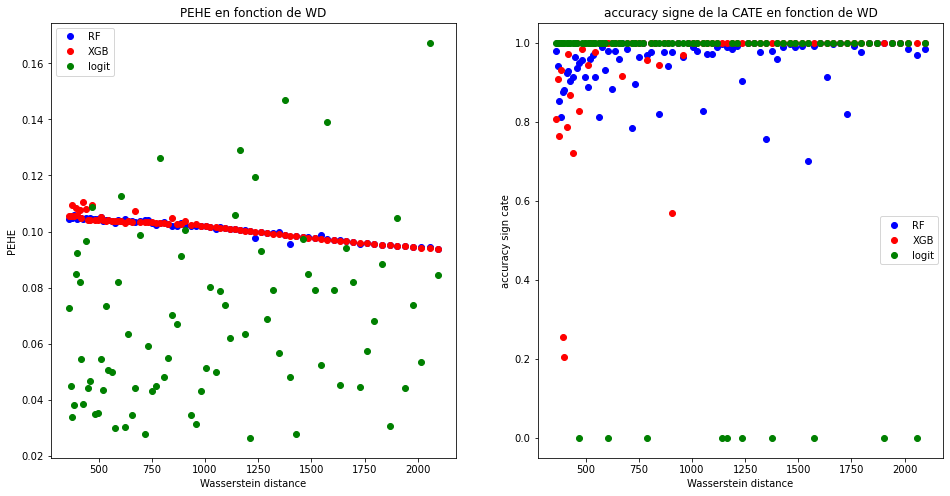

In [40]:
benchmarking_graph(nbr_model= 1, weight= False, function_type="linear", coef_tt=1.1, coef_tt_const=True)

#### 1 modèle avec poids <a class="anchor" id="lc1modw"></a>

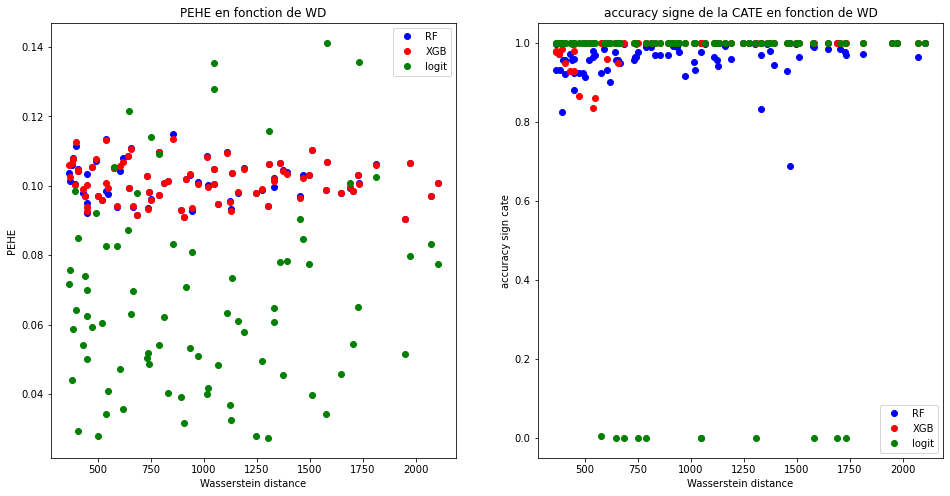

In [6]:
benchmarking_graph(nbr_model= 1, weight= True, function_type="linear", coef_tt=1.1, coef_tt_const=True)

#### 2 modèles avec poids <a class="anchor" id="lc2modw"></a>

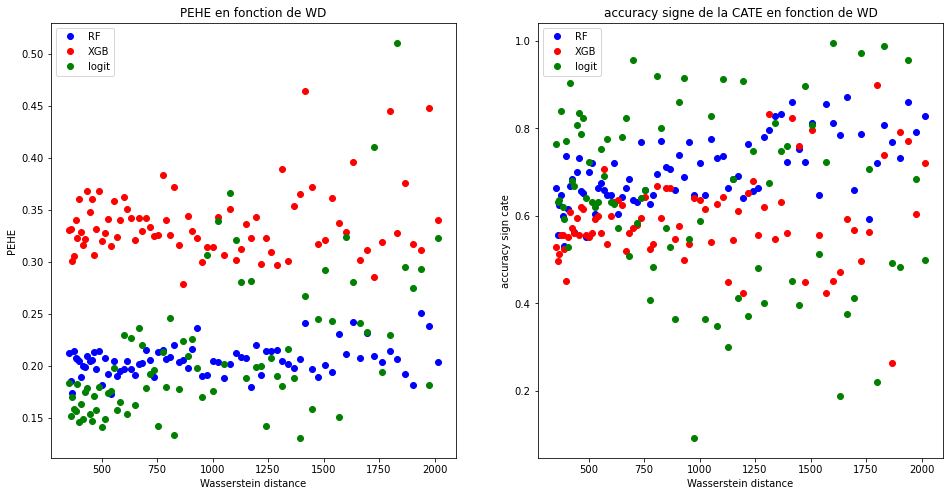

In [45]:
benchmarking_graph(nbr_model= 2, weight= True, function_type="linear", coef_tt=1.1, coef_tt_const=True)

#### Comparaison <a class="anchor" id="lcbench"></a>

In [8]:
benchmarking_table(function_type = "linear", coef_tt = 1.1, coef_tt_const = True)

Pour WD = 367.76361083984375 (wd_para = 0.0) 

Pour 1 modèle sans poids
       accu_0  accu_1    MSE_p0    MSE_p1      PEHE  accu_sign_cate
RF      0.736   0.760  0.128258  0.127423  0.104426           0.960
xgb     0.712   0.752  0.127295  0.127892  0.107529           0.896
logit   0.920   0.920  0.004331  0.003972  0.053525           1.000 

Pour 1 modèle avec poids
       accu_0  accu_1    MSE_p0    MSE_p1      PEHE  accu_sign_cate
RF      0.732   0.744  0.130890  0.131484  0.103468           0.904
xgb     0.704   0.716  0.133105  0.132512  0.104603           0.972
logit   0.928   0.900  0.015684  0.015359  0.149935           1.000 

Pour 2 modèles avec poids
       accu_0  accu_1    MSE_p0    MSE_p1      PEHE  accu_sign_cate
RF      0.712   0.756  0.137259  0.127390  0.167449           0.748
xgb     0.664   0.700  0.163462  0.151521  0.333831           0.692
logit   0.920   0.912  0.020857  0.024232  0.217618           0.680 

Pour WD = 579.0753784179688 (wd_para = 2.0) 

Pour 1 mo

### $\gamma = 1*std(XB)$  <a class="anchor" id="lnconstant"></a>

#### 1 modèle sans poids <a class="anchor" id="lnc1mod"></a>

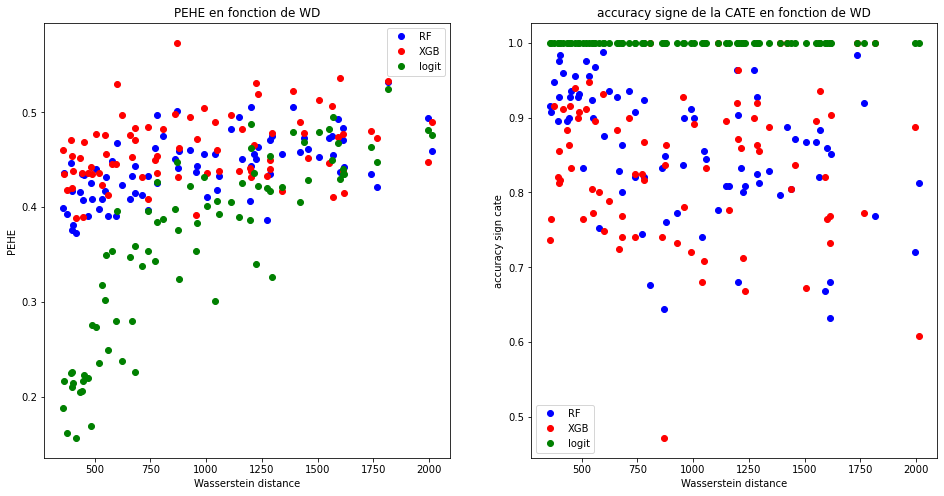

In [9]:
benchmarking_graph(nbr_model= 1, weight= False, function_type="linear", coef_tt=1, coef_tt_const=False)

#### 1 modèle avec poids <a class="anchor" id="lnc1modw"></a>

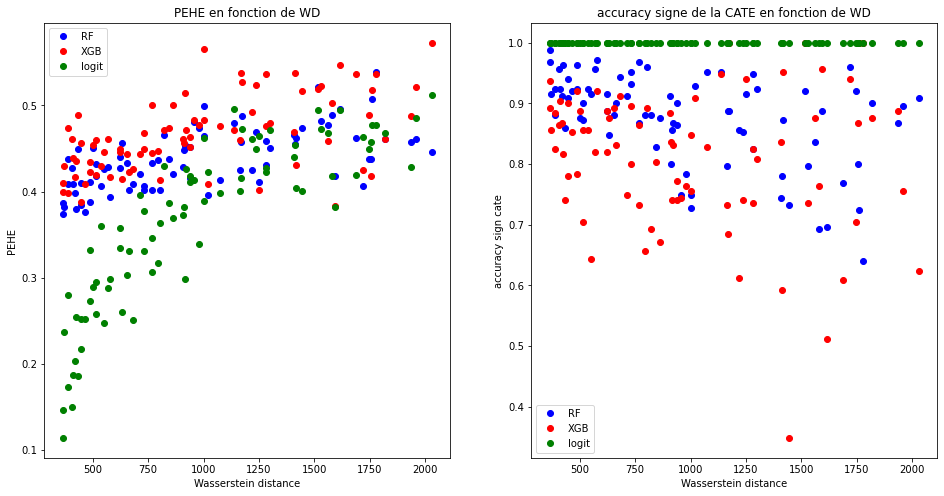

In [10]:
benchmarking_graph(nbr_model= 1, weight= True, function_type="linear", coef_tt=1, coef_tt_const=False)

#### 2 modèles avec poids  <a class="anchor" id="lnc2modw"></a>

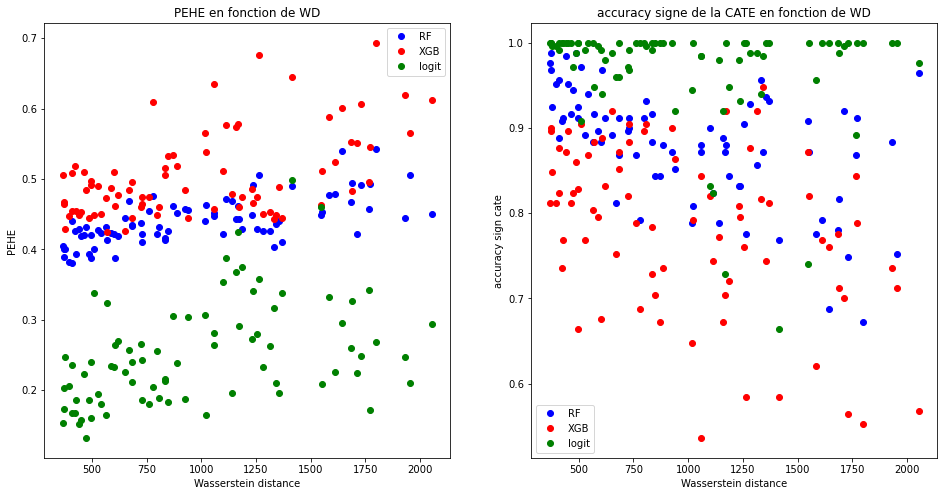

In [11]:
benchmarking_graph(nbr_model= 2, weight= True, function_type="linear", coef_tt=1, coef_tt_const=False)

#### Comparaison <a class="anchor" id="lncbench"></a>

In [12]:
benchmarking_table(function_type = "linear", coef_tt = 1, coef_tt_const = False)

Pour WD = 362.5144348144531 (wd_para = 0.0) 

Pour 1 modèle sans poids
       accu_0  accu_1    MSE_p0    MSE_p1      PEHE  accu_sign_cate
RF      0.668   0.844  0.160515  0.095974  0.413541           0.980
xgb     0.672   0.804  0.153541  0.107097  0.413324           0.924
logit   0.920   0.944  0.015471  0.008734  0.159473           1.000 

Pour 1 modèle avec poids
       accu_0  accu_1    MSE_p0    MSE_p1      PEHE  accu_sign_cate
RF      0.732   0.836  0.149020  0.096132  0.397626           0.980
xgb     0.700   0.820  0.152907  0.090057  0.455775           0.872
logit   0.916   0.936  0.014000  0.006773  0.144733           1.000 

Pour 2 modèles avec poids
       accu_0  accu_1    MSE_p0    MSE_p1      PEHE  accu_sign_cate
RF      0.708   0.848  0.149960  0.092305  0.395092           0.984
xgb     0.676   0.796  0.161694  0.112704  0.478162           0.888
logit   0.932   0.936  0.005465  0.008409  0.120478           1.000 

Pour WD = 586.1038208007812 (wd_para = 2.0) 

Pour 1 mod

## Linéaire intéraction  <a class="anchor" id="interaction"></a>

## $ Y_i \sim \mathcal{\beta}( \sigma (X\beta + \gamma t + \alpha X t))$ avec $\sigma = sigmoid$   et  $\alpha = \frac{\beta}{3}  $

### $\gamma = 1.1$ (constant) <a class="anchor" id="intconstant"></a>

#### 1 modèle sans poids  <a class="anchor" id="intc1mod"></a>

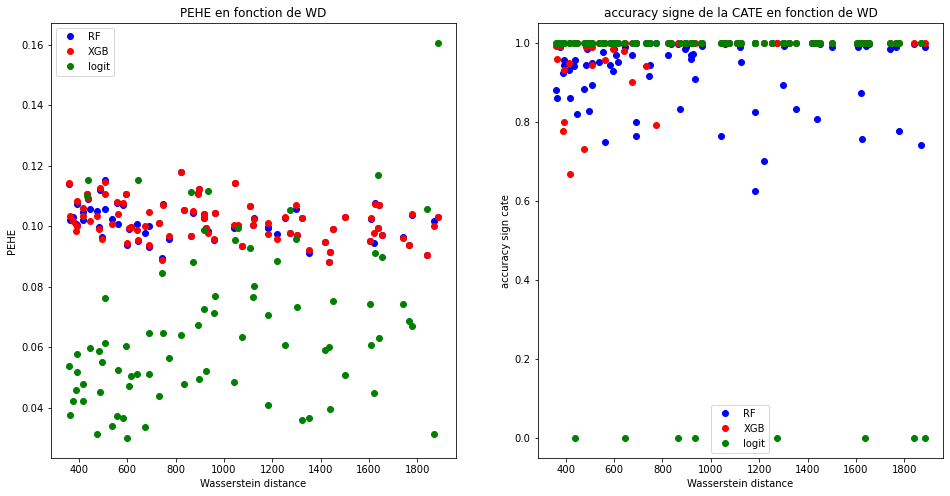

In [13]:
benchmarking_graph(nbr_model= 1, weight= False, function_type="interaction", coef_tt=1.1, coef_tt_const=True)

#### 1 modèle avec poids <a class="anchor" id="intc1modw"></a>

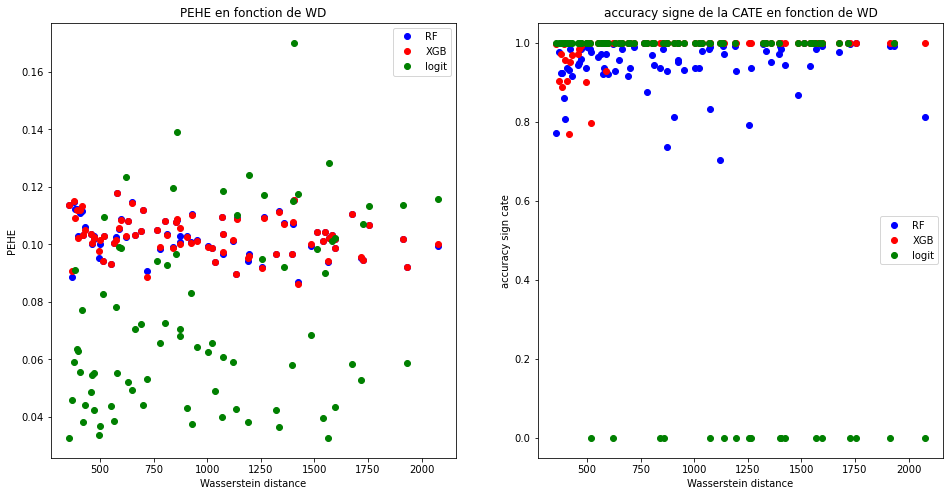

In [14]:
benchmarking_graph(nbr_model= 1, weight= True, function_type="interaction", coef_tt=1.1, coef_tt_const=True)

#### 2 modèles avec poids  <a class="anchor" id="intc2modw"></a>

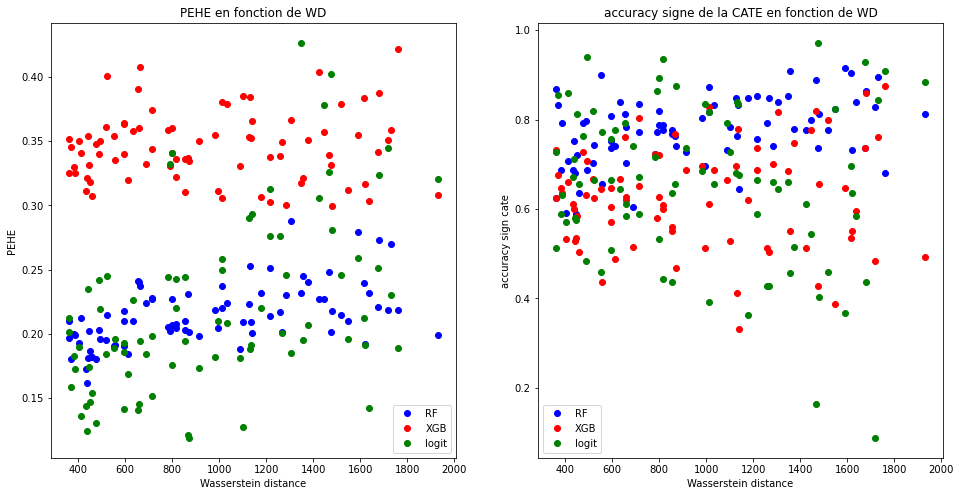

In [15]:
benchmarking_graph(nbr_model= 2, weight= True, function_type="interaction", coef_tt=1.1, coef_tt_const=True)

#### Comparaison   <a class="anchor" id="intcbench"></a>

In [16]:
benchmarking_table(function_type = "interaction", coef_tt = 1.1, coef_tt_const = True)

Pour WD = 355.87322998046875 (wd_para = 0.0) 

Pour 1 modèle sans poids
       accu_0  accu_1    MSE_p0    MSE_p1      PEHE  accu_sign_cate
RF      0.760   0.752  0.138398  0.143503  0.092990           0.984
xgb     0.736   0.740  0.142046  0.145719  0.093257           0.956
logit   0.920   0.912  0.008638  0.008428  0.046198           1.000 

Pour 1 modèle avec poids
       accu_0  accu_1    MSE_p0    MSE_p1      PEHE  accu_sign_cate
RF      0.720   0.728  0.142919  0.143568  0.091010           0.828
xgb     0.728   0.708  0.154569  0.155442  0.094409           0.940
logit   0.924   0.900  0.015440  0.012566  0.091342           1.000 

Pour 2 modèles avec poids
       accu_0  accu_1    MSE_p0    MSE_p1      PEHE  accu_sign_cate
RF      0.720   0.688  0.157520  0.150906  0.189785           0.848
xgb     0.676   0.648  0.169078  0.171013  0.351308           0.700
logit   0.928   0.880  0.021245  0.024012  0.198835           0.832 

Pour WD = 566.136474609375 (wd_para = 2.0) 

Pour 1 mod

### $\gamma = std(XB)$    <a class="anchor" id="intnconstant"></a>

#### 1 modèle sans poids   <a class="anchor" id="intnc1mod"></a>

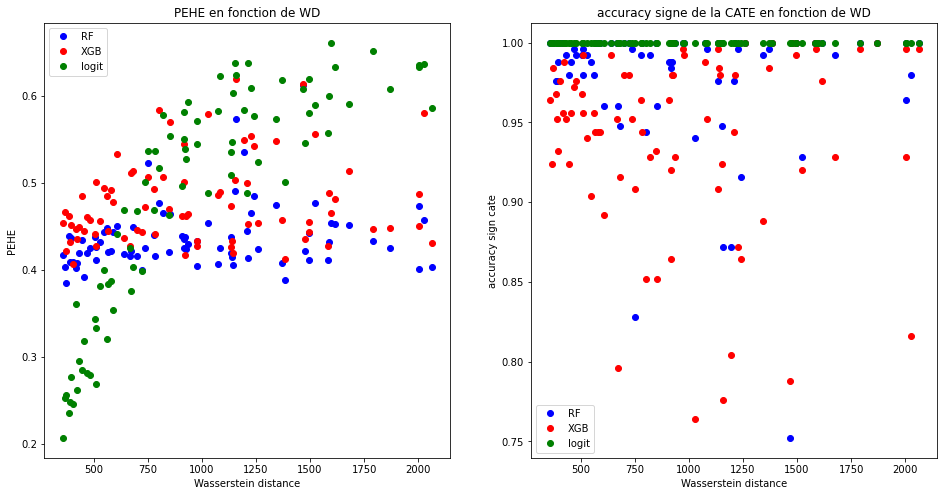

In [17]:
benchmarking_graph(nbr_model= 1, weight= False, function_type="interaction", coef_tt=2, coef_tt_const=False)

#### 1 modèle avec poids  <a class="anchor" id="intnc1modw"></a>

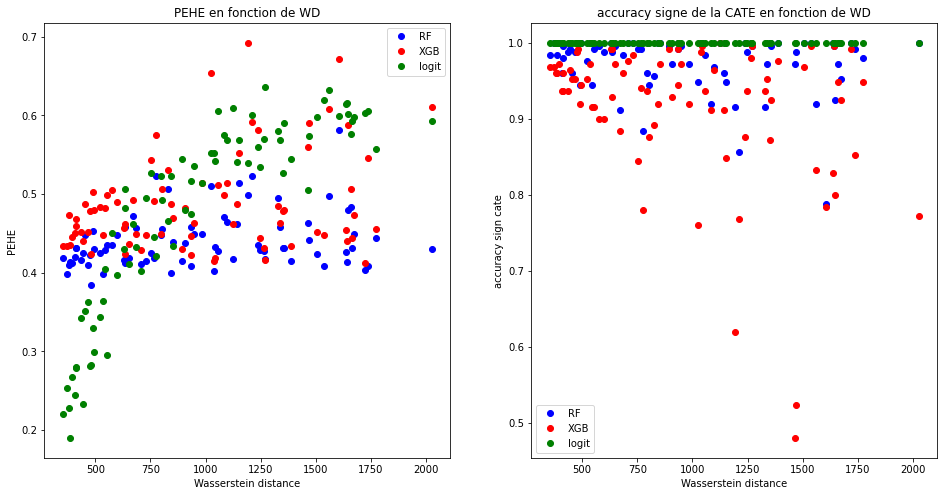

In [18]:
benchmarking_graph(nbr_model= 1, weight= True, function_type="interaction", coef_tt=2, coef_tt_const=False)

#### 2 modèles avec poids  <a class="anchor" id="intnc2modw"></a>

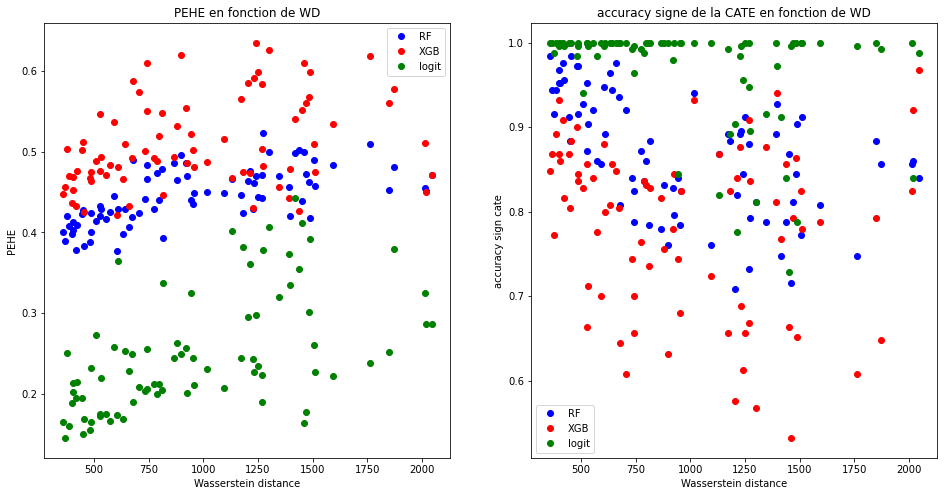

In [20]:
benchmarking_graph(nbr_model= 2, weight= True, function_type="interaction", coef_tt=1, coef_tt_const=False)

#### Comparaison   <a class="anchor" id="intncbench"></a>

In [21]:
benchmarking_table(function_type = "interaction", coef_tt = 1, coef_tt_const = False)

Pour WD = 352.90899658203125 (wd_para = 0.0) 

Pour 1 modèle sans poids
       accu_0  accu_1    MSE_p0    MSE_p1      PEHE  accu_sign_cate
RF      0.716   0.800  0.149017  0.103484  0.392807            0.90
xgb     0.720   0.804  0.147908  0.102848  0.429142            0.72
logit   0.900   0.912  0.011651  0.016055  0.171533            1.00 

Pour 1 modèle avec poids
       accu_0  accu_1    MSE_p0    MSE_p1      PEHE  accu_sign_cate
RF      0.668   0.788  0.150185  0.109599  0.405623            0.90
xgb     0.676   0.772  0.155930  0.109594  0.431367            0.82
logit   0.904   0.936  0.007128  0.007372  0.123847            1.00 

Pour 2 modèles avec poids
       accu_0  accu_1    MSE_p0    MSE_p1      PEHE  accu_sign_cate
RF      0.700   0.788  0.146312  0.104755  0.382392           0.896
xgb     0.676   0.768  0.153085  0.117952  0.452616           0.764
logit   0.924   0.920  0.006862  0.019082  0.161903           1.000 

Pour WD = 556.927978515625 (wd_para = 2.0) 

Pour 1 mod

# Non linéaire   <a class="anchor" id="nlineaire"></a>

## $Y_i \sim \mathcal{B}(\Pi (s(X) + \gamma t ))$  avec  $s(X) =  \sum_{j=1}^{p-1} \sin(X_j \times X_{j+1}) $

### $ \gamma = std(s(X))$   <a class="anchor" id="nlnconstant"></a>

In [22]:
def f1(features):
    nbr_individuals = features.shape[0]
    nbr_features = features.shape[1]
    s_x = []
    for i in range(nbr_individuals):
        s_xi = 0
        for j in range(nbr_features-1):
            s_xi = s_xi + np.sin(features[i,j] * features[i,j+1])
        s_xi = 1 * s_xi
        s_x.append(s_xi)
    return s_x

#### 1 modèle sans poids   <a class="anchor" id="nlnc1mod"></a>

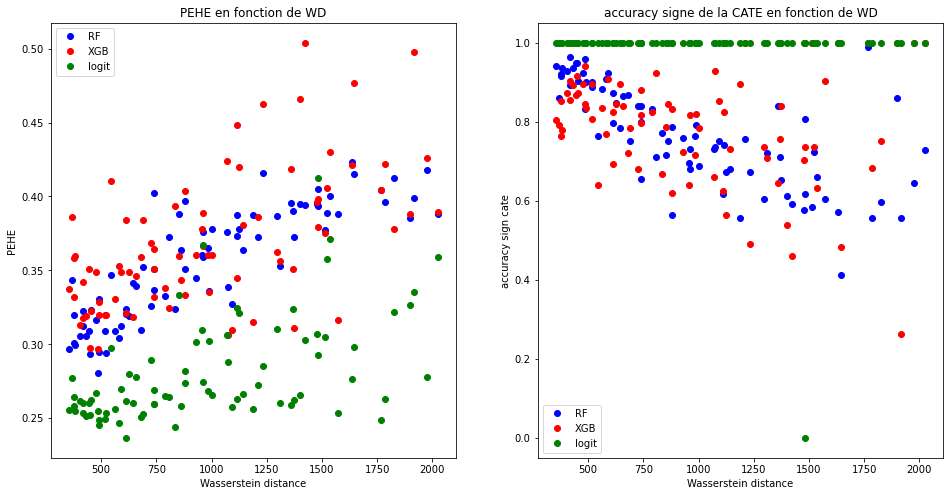

In [23]:
benchmarking_graph(nbr_model= 1, weight= False, function_type="non-linear", coef_tt=1,
                   coef_tt_const=False, function = f1)

#### 1 modèle avec poids    <a class="anchor" id="nlnc1modw"></a>

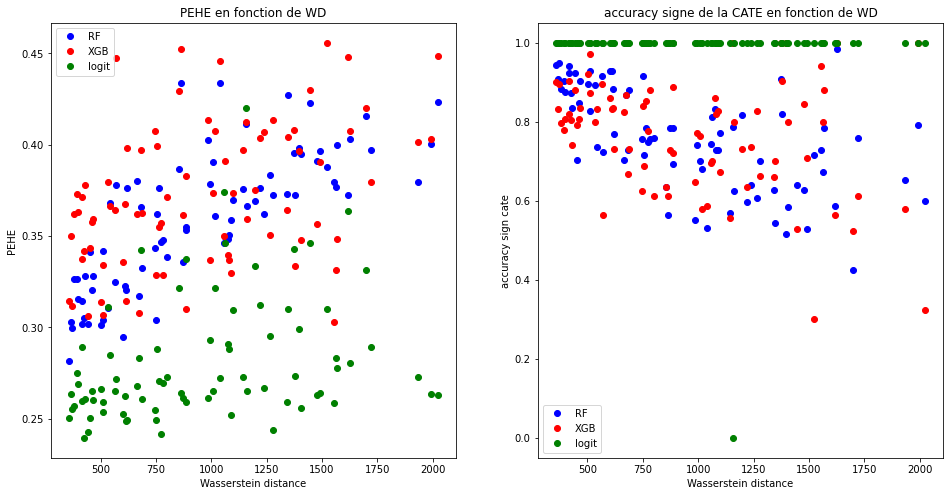

In [25]:
benchmarking_graph(nbr_model= 1, weight= True, function_type="non-linear", coef_tt=1, 
                   coef_tt_const=False, function = f1)

#### 2 modèles avec poids    <a class="anchor" id="nlnc2modw"></a>

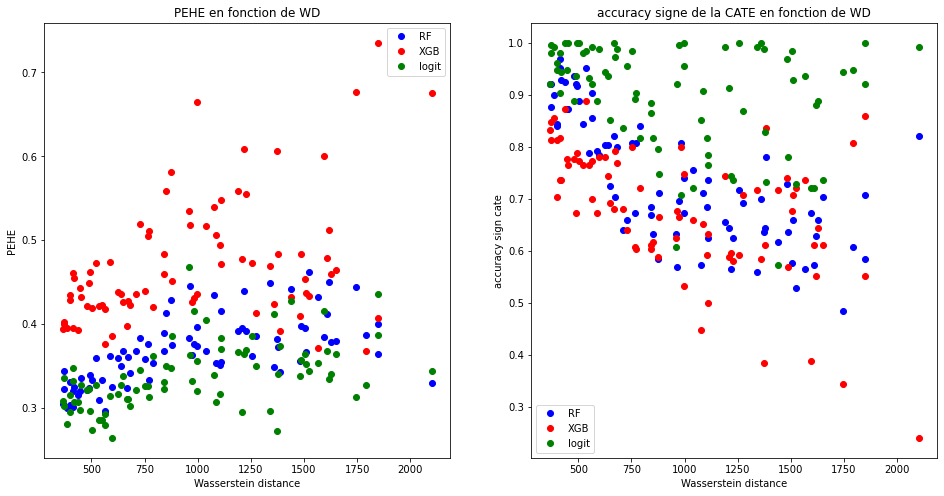

In [26]:
benchmarking_graph(nbr_model= 2, weight= True, function_type="non-linear", coef_tt=1, 
                   coef_tt_const=False, function = f1)

#### comparaison   <a class="anchor" id="nlncbench"></a>

In [27]:
benchmarking_table(function_type = "non-linear", coef_tt = 1, coef_tt_const = False, function = f1)

Pour WD = 366.7513427734375 (wd_para = 0.0) 

Pour 1 modèle sans poids
       accu_0  accu_1    MSE_p0    MSE_p1      PEHE  accu_sign_cate
RF      0.492   0.828  0.156832  0.099978  0.285467           0.932
xgb     0.512   0.780  0.173005  0.113010  0.325309           0.888
logit   0.488   0.856  0.156522  0.082266  0.256163           1.000 

Pour 1 modèle avec poids
       accu_0  accu_1    MSE_p0    MSE_p1      PEHE  accu_sign_cate
RF      0.516   0.796  0.161124  0.108165  0.303874            0.90
xgb     0.556   0.760  0.165224  0.125336  0.330772            0.84
logit   0.492   0.848  0.164649  0.084555  0.259281            1.00 

Pour 2 modèles avec poids
       accu_0  accu_1    MSE_p0    MSE_p1      PEHE  accu_sign_cate
RF      0.532   0.796  0.157812  0.109256  0.308576           0.892
xgb     0.556   0.744  0.196399  0.132974  0.407650           0.812
logit   0.488   0.820  0.191206  0.096707  0.351069           0.908 

Pour WD = 564.9039916992188 (wd_para = 2.0) 

Pour 1 mod

## $Y_i \sim \mathcal{B}(\Pi (s(X_i) + \gamma t ))$  avec  $s(X_i) = 10 \sin ( X_i \beta )$ et $\Pi(x) = \frac{\arctan(x) + \frac{\pi}{2}  }{\pi}$

In [28]:
def f2(features):
    s_x = 10*np.sin(features.dot(param_sim["beta"]))
    return s_x


In [29]:
def pi2(xi):
    s_xi = (np.arctan(xi) + np.pi/2)/np.pi
    return s_xi

#### 1 modèle sans poids

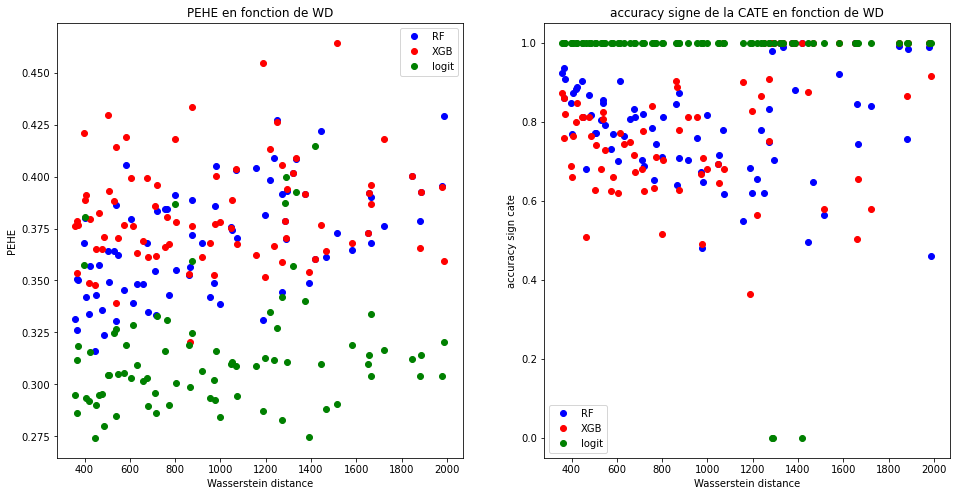

In [30]:
benchmarking_graph(nbr_model= 1, weight= False, function_type="non-linear", coef_tt=1,
                   coef_tt_const=False, function = f2, pi=pi2)

#### 1 modèle avec poids

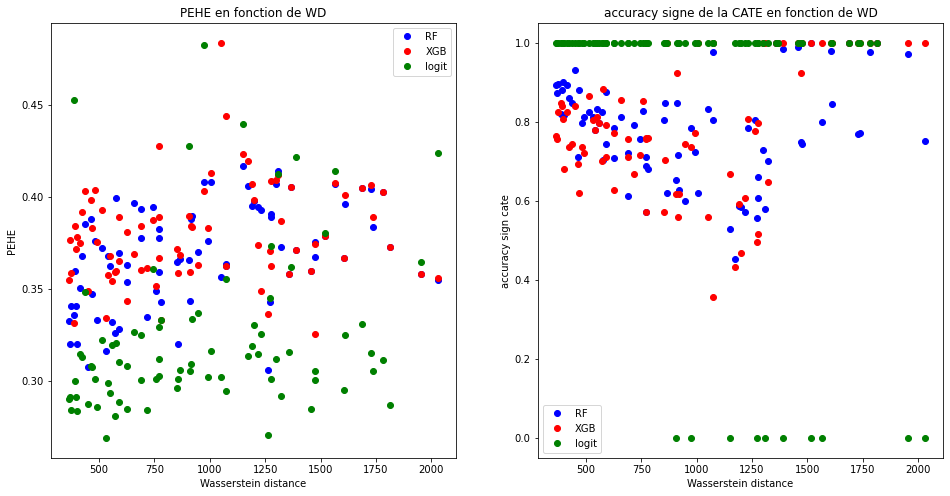

In [31]:
benchmarking_graph(nbr_model= 1, weight= True, function_type="non-linear", coef_tt=1,
                   coef_tt_const=False, function = f2, pi=pi2)

#### 2 modèles avec poids

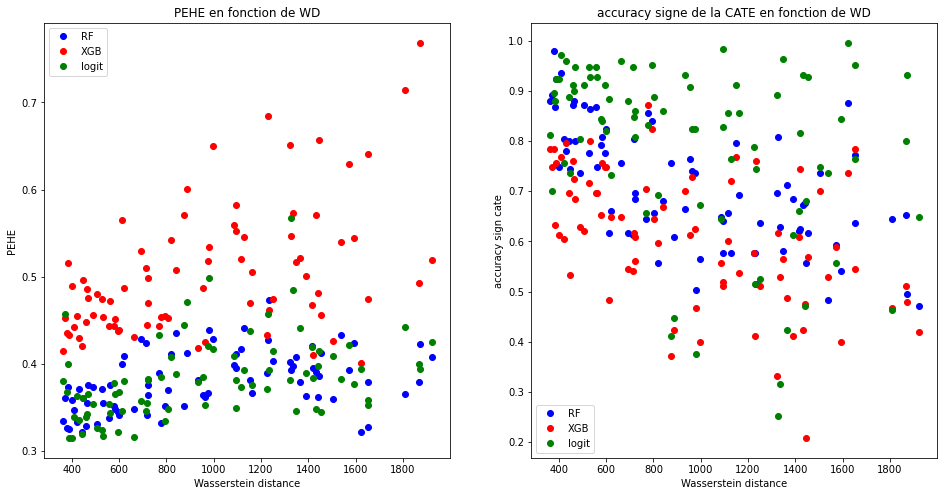

In [32]:
benchmarking_graph(nbr_model= 2, weight= True, function_type="non-linear", coef_tt=1,
                   coef_tt_const=False, function = f2, pi=pi2)

#### Comparaison

In [33]:
benchmarking_table(function_type = "non-linear", coef_tt = 1, coef_tt_const = False, function = f2, pi=pi2)

Pour WD = 362.467529296875 (wd_para = 0.0) 

Pour 1 modèle sans poids
       accu_0  accu_1    MSE_p0    MSE_p1      PEHE  accu_sign_cate
RF      0.500   0.736  0.230424  0.143425  0.357585           0.892
xgb     0.508   0.664  0.261624  0.181573  0.369228           0.828
logit   0.540   0.748  0.220235  0.127045  0.315957           1.000 

Pour 1 modèle avec poids
       accu_0  accu_1    MSE_p0    MSE_p1      PEHE  accu_sign_cate
RF      0.496   0.716  0.228195  0.142669  0.354609           0.920
xgb     0.492   0.688  0.263436  0.165262  0.391768           0.764
logit   0.504   0.748  0.230028  0.131214  0.318809           1.000 

Pour 2 modèles avec poids
       accu_0  accu_1    MSE_p0    MSE_p1      PEHE  accu_sign_cate
RF      0.484   0.744  0.229742  0.141277  0.363607           0.908
xgb     0.564   0.656  0.249611  0.179157  0.441037           0.792
logit   0.512   0.728  0.234571  0.144134  0.371183           0.916 

Pour WD = 571.4030151367188 (wd_para = 2.0) 

Pour 1 modè

# Non linéaire + interaction

## $Y_i \sim \mathcal{B}(\Pi (s(X_i,t)))$  avec  $s(X_i,t) =  \sum_{j=1}^{p-1} \sin(X_{i,j} \times X_{i,j+1}) + 3\cos(\gamma t)$ avec $\gamma = 1.1$  

In [ ]:
def f3(features,tt):
    nbr_individuals = features.shape[0]
    nbr_features = features.shape[1]
    s_x = []
    for i in range(nbr_individuals):
        s_xi = 0
        for j in range(nbr_features-1):
            s_xi = s_xi + np.sin(features[i,j] * features[i,j+1]) 
        s_xi = s_xi + 6*np.cos(1.1*tt[i])
        s_x.append(s_xi)
    return s_x


In [ ]:
benchmarking_graph(nbr_model= 1, weight= False, function_type="non-linear-interaction", coef_tt=1,
                   coef_tt_const=True, function = f3)